In [26]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

In [75]:
age_data_list = []
# Simulate camera data
for year in range(2020, 2024):  # You can adjust the range of years as needed
    for month in range(1, 13):
        days_in_month = pd.Timestamp(f'{year}-{month}-01').days_in_month
        for day in range(1, days_in_month + 1):
            # Generate date based on year, month, and day
            date = f"{year}-{str(month).zfill(2)}-{str(day).zfill(2)}"
            # Generate random hour between 8 and 17
            hour = np.random.randint(8, 18)

            # Create timestamp for the transaction
            date_time = pd.Timestamp(f"{date} {hour:02d}:00:00")

            # Randomly choose the number of people detected in the store
            num_people = np.random.randint(1, 16)
            
            year = date_time.year
            month = date_time.month
            
            detection_id = len(age_data_list) + 1
            store_sector = np.random.choice(['SectionA', 'SectionB', 'SectionC'])
            # Generate detection data for each face
            for person in range(1, num_people + 1):
                emotion = np.random.choice(['Happy', 'Neutral', 'Sad'])
                age = np.random.randint(18, 70)
                face_id = np.random.uniform(0, 1)
                occ_time = np.random.randint(3, 12)
                age_data_list.append({
                    'Timestamp': date_time,
                    'Year': year,
                    'Month': month,
                    'DetectionID': detection_id,
                    'StoreSection': store_sector,
                    'NumPeople': num_people,
                    'Emotion': emotion,
                    'Age': age,
                    'FaceID': face_id,
                    'OccupationTime': occ_time
                })

camera_df = pd.DataFrame(age_data_list)
camera_df['Date'] = pd.to_datetime(camera_df['Timestamp']).dt.date
camera_df.head(2)

,Timestamp,Year,Month,DetectionID,StoreSection,NumPeople,Emotion,Age,FaceID,OccupationTime,Date
0,2020-01-01 08:00:00,2020,1,1,SectionA,6,Sad,67,0.757215,5,2020-01-01
1,2020-01-01 08:00:00,2020,1,1,SectionA,6,Sad,57,0.918887,7,2020-01-01


In [73]:
# Initialize an empty list to store payment data
payment_data_list = []

# Simulate payment data per day for all months and years
for year in range(2020, 2024):  # You can adjust the range of years as needed
    for month in range(1, 13):
        days_in_month = pd.Timestamp(f'{year}-{month}-01').days_in_month

        for day in range(1, days_in_month + 1):
            # Generate date based on year, month, and day
            date = f"{year}-{str(month).zfill(2)}-{str(day).zfill(2)}"

            # Generate random hour between 8 and 17
            hour = np.random.randint(8, 18)

            # Create timestamp for the transaction
            date_time = pd.Timestamp(f"{date} {hour:02d}:00:00")

            # Randomly choose the number of products for the transaction (assuming a range of 1 to 5 products)
            num_products = np.random.randint(1, 6)
            
            transaction_id = len(payment_data_list) + 1
            year = date_time.year
            month = date_time.month
            
            # Generate payment data for each product
            for product_num in range(1, num_products + 1):
                # Generate other random payment details
                product_id = np.random.choice([101, 102, 103])
                product_name = np.random.choice(['ProductA', 'ProductB', 'ProductC'])
                product_category = np.random.choice(['Smartphones & Accessories', 'Laptops & Computers', 'Audio & Headphones','Home Electronics'])
                quantity = np.random.randint(1, 5)
                cost = np.random.uniform(10, 100)
                amount = np.random.uniform(10, 200)
                profit = amount-cost
                employee = np.random.choice(['Emp1', 'Emp2', 'Emp3'])
                store_sector_product = np.random.choice(['SectionA', 'SectionB', 'SectionC'])
                payment_method = np.random.choice(['Credit Card', 'Debit Card', 'Cash'])

                # Append the payment data to the list
                payment_data_list.append({
                    'Timestamp': date_time,
                    'Year': year,
                    'Month': month,
                    'TransactionID': transaction_id,
                    'ProductID': product_id,
                    'ProductName': product_name,
                    'ProductCategory': product_category,
                    'Quantity': quantity,
                    'Amount': amount,
                    'Profit':profit,
                    'Employee': employee,
                    'StoreSector_product': store_sector_product,
                    'PaymentMethod': payment_method,
                })

# Create a DataFrame from the list of payment data
payment_df = pd.DataFrame(payment_data_list)
payment_df['Order_date'] = pd.to_datetime(payment_df['Timestamp']).dt.date

# Display the simulated payment data
payment_df.head()

,Timestamp,Year,Month,TransactionID,ProductID,ProductName,ProductCategory,Quantity,Amount,Profit,Employee,StoreSector_product,PaymentMethod,Order_date
0,2020-01-01 13:00:00,2020,1,1,102,ProductC,Smartphones & Accessories,2,186.584096,137.498172,Emp1,SectionB,Credit Card,2020-01-01
1,2020-01-01 13:00:00,2020,1,1,101,ProductB,Home Electronics,1,143.378346,127.504394,Emp1,SectionA,Cash,2020-01-01
2,2020-01-02 09:00:00,2020,1,3,103,ProductC,Audio & Headphones,3,155.557738,77.943134,Emp3,SectionB,Credit Card,2020-01-02
3,2020-01-02 09:00:00,2020,1,3,103,ProductB,Smartphones & Accessories,3,184.427674,173.690833,Emp3,SectionB,Credit Card,2020-01-02
4,2020-01-02 09:00:00,2020,1,3,102,ProductB,Audio & Headphones,4,162.127622,130.337248,Emp1,SectionC,Cash,2020-01-02


In [76]:
# Save datasets to CSV files
payment_df.to_csv('payments_dataset.csv', index=False)
camera_df.to_csv('camera_dataset.csv', index=False)

In [24]:
import pandas as pd
import numpy as np

# Simulated datasets
# ... (Your provided payment_df and camera_df data)

# Combine payment and camera data
combined_df = pd.merge(payment_df, camera_df, on='Timestamp', how='left')

# Occupation KPIs
occupation_count_hour = combined_df.groupby(combined_df['Timestamp'].dt.hour)['TransactionID'].count()
occupation_count_day = combined_df.groupby(combined_df['Timestamp'].dt.day)['TransactionID'].count()
occupation_count_month = combined_df.groupby(combined_df['Timestamp'].dt.month)['TransactionID'].count()

# Assuming 'Sale' occurs when Amount is greater than 0
combined_df['SaleMade'] = np.where(combined_df['Amount'] > 0, 1, 0)
average_occupation_time = combined_df.groupby('Timestamp')['TransactionID'].count().mean()
average_occupation_time_sale = combined_df[combined_df['SaleMade'] == 1].groupby('Timestamp')['TransactionID'].count().mean()
average_occupation_time_abandoned = combined_df[combined_df['SaleMade'] == 0].groupby('Timestamp')['TransactionID'].count().mean()

# Conversion Rate KPIs
store_conversion_rate = combined_df[combined_df['SaleMade'] == 1]['TransactionID'].nunique() / combined_df['TransactionID'].nunique()
conversion_rate_age = combined_df[combined_df['SaleMade'] == 1].groupby('Ages')['TransactionID'].nunique() / combined_df.groupby('Ages')['TransactionID'].nunique()
conversion_rate_product = combined_df[combined_df['SaleMade'] == 1].groupby('ProductName')['TransactionID'].nunique() / combined_df.groupby('ProductName')['TransactionID'].nunique()

# Employee Performance KPIs
clients_served_employee = combined_df.groupby('Employee')['TransactionID'].count()
conversion_rate_employee = combined_df[combined_df['SaleMade'] == 1].groupby('Employee')['TransactionID'].nunique() / combined_df.groupby('Employee')['TransactionID'].nunique()
client_emotions_employee = combined_df.groupby(['Employee', 'Emotions']).size().unstack(fill_value=0)

# Products KPIs
top_selling_products = combined_df.groupby('ProductName')['Amount'].sum().nlargest(1)
underperforming_products = combined_df.groupby('ProductName')['Amount'].sum().nsmallest(1)
average_items_per_transaction = combined_df.groupby('TransactionID')['ProductID'].count().mean()
average_transaction_value = combined_df[combined_df['SaleMade'] == 1]['Amount'].mean()
# products_frequently_bought_together = combined_df.groupby('TransactionID')['ProductName'].unique().value_counts().nlargest(1)

# Others KPIs
number_of_returning_customers = camera_df.groupby('FacesID')['Timestamp'].count().sum()
frequent_age_of_sale_item = combined_df.groupby('ProductID')['Ages'].agg(lambda x: x.value_counts().index[0] if not x.value_counts().empty else np.nan)
average_time_in_store_sector = combined_df.groupby('StoreSector')['Timestamp'].count().mean()
emotion_age_cross = combined_df.groupby(['Emotions', 'Ages']).size().unstack(fill_value=0)

# Display KPIs
print("Occupation KPIs:")
print("Occupation Count per Hour:\n", occupation_count_hour)
print("Occupation Count per Day:\n", occupation_count_day)
print("Occupation Count per Month:\n", occupation_count_month)
print("Average Occupation Time:", average_occupation_time)
print("Average Occupation Time (Sale):", average_occupation_time_sale)
print("Average Occupation Time (Abandoned):", average_occupation_time_abandoned)

print("\nConversion Rate KPIs:")
print("Store Conversion Rate:", store_conversion_rate)
print("Conversion Rate by Age:\n", conversion_rate_age)
print("Conversion Rate by Product:\n", conversion_rate_product)

print("\nEmployee Performance KPIs:")
print("Clients Served per Employee:\n", clients_served_employee)
print("Conversion Rate per Employee:\n", conversion_rate_employee)
print("Client Emotions per Employee:\n", client_emotions_employee)

print("\nProducts KPIs:")
print("Top Selling Products:\n", top_selling_products)
print("Underperforming Products:\n", underperforming_products)
print("Average Items per Transaction:", average_items_per_transaction)
print("Average Transaction Value:", average_transaction_value)
# print("Products Frequently Bought Together:\n", products_frequently_bought_together)

print("\nOthers KPIs:")
print("Number of Returning Customers:\n", number_of_returning_customers)
print("Frequent Age of Sale per Item:\n", frequent_age_of_sale_item)
print("Average Time in Store Sector:\n", average_time_in_store_sector)
print("Emotion x Age:\n", emotion_age_cross)

Occupation KPIs:
Occupation Count per Hour:
 Timestamp
0     157
1     156
2     156
3     156
4     156
5     156
6     156
7     156
8     156
9     156
10    156
11    156
12    156
13    156
14    156
15    156
16    156
17    156
18    156
19    156
20    156
21    156
22    156
23    156
Name: TransactionID, dtype: int64
Occupation Count per Day:
 Timestamp
1     288
2     288
3     288
4     288
5     288
6     288
7     288
8     288
9     288
10    288
11    288
12    288
13    288
14      1
Name: TransactionID, dtype: int64
Occupation Count per Month:
 Timestamp
3    3745
Name: TransactionID, dtype: int64
Average Occupation Time: 1.0
Average Occupation Time (Sale): 1.0
Average Occupation Time (Abandoned): nan

Conversion Rate KPIs:
Store Conversion Rate: 1.0
Conversion Rate by Age:
 Ages
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    1.0
29    1.0
30    1.0
31    1.0
32    1.0
33    1.0
34    1.0
35    1.0
36    1.0
3

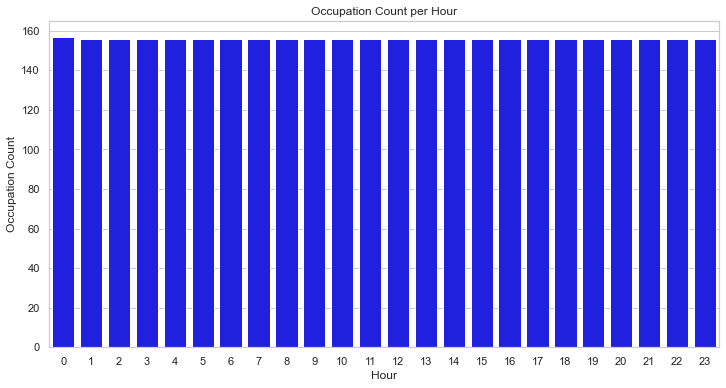

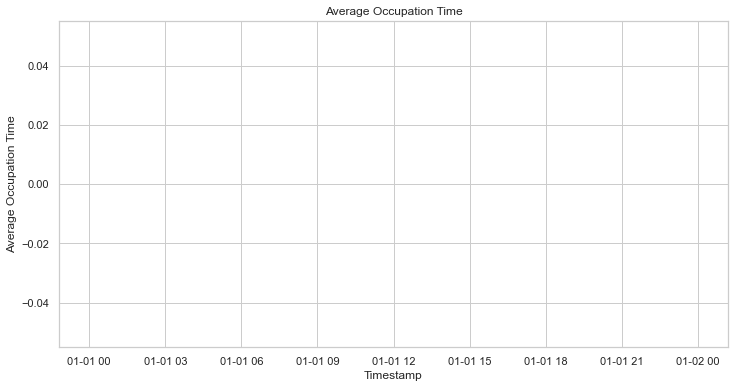

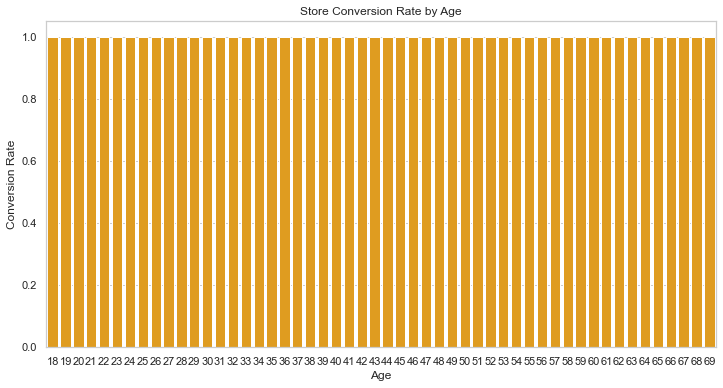

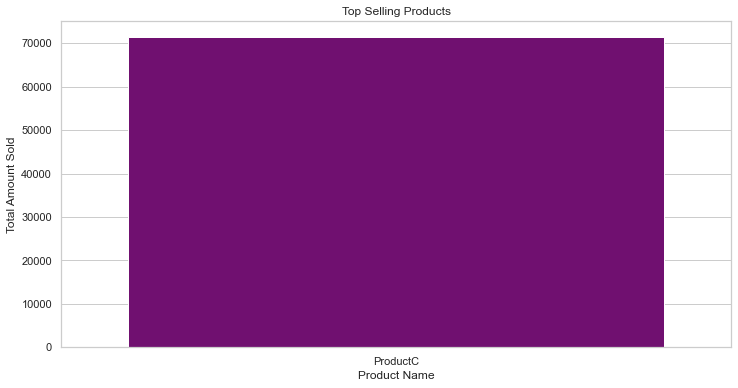

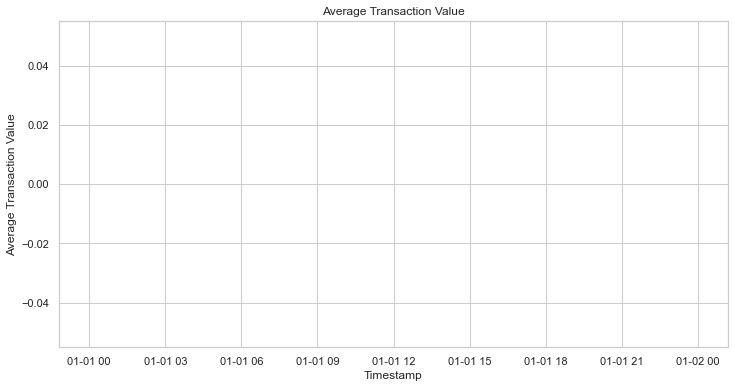

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")

# Occupation Count per Hour
plt.figure(figsize=(12, 6))
sns.barplot(x=occupation_count_hour.index, y=occupation_count_hour.values, color='blue')
plt.title('Occupation Count per Hour')
plt.xlabel('Hour')
plt.ylabel('Occupation Count')
plt.show()

# Average Occupation Time
plt.figure(figsize=(12, 6))
sns.lineplot(x=combined_df['Timestamp'], y=combined_df.groupby('Timestamp')['TransactionID'].count().rolling(window=50).mean(), color='green')
plt.title('Average Occupation Time')
plt.xlabel('Timestamp')
plt.ylabel('Average Occupation Time')
plt.show()

# Store Conversion Rate by Age
plt.figure(figsize=(12, 6))
sns.barplot(x=conversion_rate_age.index, y=conversion_rate_age.values, color='orange')
plt.title('Store Conversion Rate by Age')
plt.xlabel('Age')
plt.ylabel('Conversion Rate')
plt.show()

# Top Selling Products
plt.figure(figsize=(12, 6))
sns.barplot(x=top_selling_products.index, y=top_selling_products.values, color='purple')
plt.title('Top Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Total Amount Sold')
plt.show()

# Average Transaction Value
plt.figure(figsize=(12, 6))
sns.lineplot(x=combined_df['Timestamp'], y=combined_df[combined_df['SaleMade'] == 1].groupby('Timestamp')['Amount'].mean().rolling(window=50).mean(), color='red')
plt.title('Average Transaction Value')
plt.xlabel('Timestamp')
plt.ylabel('Average Transaction Value')
plt.show()